# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [1]:
# Loading all necesarry libraries etc.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston


## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [2]:
# Loading data to x and y arrays

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x]) # Adding bias column
length = y.shape[0] # Dataset length
I = np.identity(2) # Identity matrix

alpha_list = np.linspace(start = 0, stop = 0.1, num = 1000) # List of alpha values (using linspace)

errors_list = [] # List of errors for each alpha value (initialization)

# Calculating errors for each alpha value using "Leave-One-Out" method
# Loop over all alpha values in alpha_list
for alpha in alpha_list:
    error = 0
    # Going over antire dataset, leaving one entry out each iteration
    for i in range(length): 
        x_i = x
        y_i = y
        x_i = np.delete(x_i, i, axis = 0)
        y_i = np.delete(y_i, i, axis = 0)
        w_i = np.linalg.inv(x_i.T * x_i + alpha * I) * x_i.T * y_i
        w_i = w_i.ravel()
        # error += ((y - x * w_i.T)[i]**2) + alpha * w_i * w_i.T)/(length) 
        error += ((y - x * w_i.T)[i]**2)/(length)
        
    errors_list.append(error[0,0])

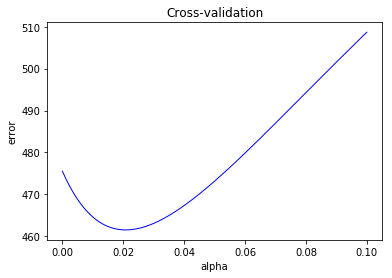

In [3]:
# Plotting error values for each alpha value

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(alpha_list, errors_list, color='blue', linewidth = 1)
#ax.scatter(alpha_list, errors_list, color='red', marker='o')

plt.title('Cross-validation')
plt.xlabel('alpha')
plt.ylabel('error')

plt.show()

In [4]:
# Finding the minimum

#errors_list.remove(errors_list[0]) # Removing first element (alphas very close to 0 produce weird results)

min_id = errors_list.index(min(errors_list)) # Find minimum

print("Minimal value of error =",errors_list[min_id]," for alpha =",alpha_list[min_id])

Minimal value of error = 461.5083140096753  for alpha = 0.02082082082082082


## 2. Implement based on the Ridge regression example, the Lasso regression.

You need only update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [5]:
# Since, in contrary to Ridge Regression, Lasso Regression doesn't have a set function for coefficients, it's necessary to use coordinate descent method.

In [6]:
# Soft threshold function for Coordinate descent
def soft_threshold(rho,lamda,norm_j):
    if rho < - lamda:
        return (rho + lamda)/(norm_j**2)
    elif rho >  lamda:
        return (rho - lamda)/(norm_j**2)
    else: 
        return 0
    
# Coordinate descent method for Lasso Regression
def coordinate_descent(coeff_array, x, y, lamda, iterations):
   
    n = x.shape[1] # Number of coordinates
    norm = (np.linalg.norm(x,axis = 0)) # Normalization factors array
    
    for i in range(iterations): # Iterations
        for j in range(n): # Coordinates

            norm_j = norm[j]
            x_j = x[:,j].reshape(-1,1)
            y_pred = x * coeff_array 
            rho = x_j.T * (y - y_pred  + x_j * coeff_array[j])
        
            if j == 0: 
                coeff_array[j] =  rho/(norm_j**2)
            else:
                coeff_array[j] =  soft_threshold(rho, lamda, norm_j)  
            
    return coeff_array.flatten()

In [7]:
# Loading data to x and y arrays

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((x.shape[0],1)),x]) # Adding bias column
n = x.shape[1] # Number of coordinates
alpha = 0.1 
initial_coefficients = np.zeros((n,1)) # Initial coefficients (zeros)

# Calculating coefficients using coordinate descent method
w = coordinate_descent(initial_coefficients, x, y, alpha, 1000)

print("Coefficients for Lasso regression are: ",w[1]," and ",w[0])

Coefficients for Lasso regression are:  1.6178194139934856  and  -180.86698943443588


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [8]:
# Loading necessary libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Feature dictionary
feature_dict = {i:label for i,label in zip(range(4),('sepal_length','sepal_width','petal_length','petal_width', ))}

In [9]:
# Loading data

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class_label'] # Renaming columns
df.dropna(how="all", inplace=True) # Dropping the empty line at file-end

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Transfering data into X and y arrays

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

X = df[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = df['class_label'].values # Class

# Renaming classes to numerical values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [11]:
# Calculating mean values for each variable for each class

np.set_printoptions(precision=4) # Number of digits of precision 

mean_vectors = [] 
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector for class nr. %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector for class nr. 1: [5.006 3.418 1.464 0.244]

Mean Vector for class nr. 2: [5.936 2.77  4.26  1.326]

Mean Vector for class nr. 3: [6.588 2.974 5.552 2.026]



In [12]:
# Within-class scatter matrix S_W

S_W = np.zeros((4,4)) # Matrix initialization

for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4)) # Scatter matrix for each class
    
    for row in X[y == cl]: # Loop over rows ("events" in dataset)
        row, mv = row.reshape(4,1), mv.reshape(4,1) # Make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
        
    S_W += class_sc_mat # Sum class scatter matrices
    
print('Within-class Scatter Matrix:\n', S_W)

Within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [13]:
# Between-class scatter matrix S_B

overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('Between-class Scatter Matrix:\n', S_B)

Between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


In [14]:
# Calculating eigenvectors and eigenvalues of matix A = inv(S_W).(S_B)

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
    print('-------------------------------')


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01
-------------------------------

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01
-------------------------------

Eigenvector 3: 
[[-0.8379]
 [ 0.1696]
 [ 0.1229]
 [ 0.5041]]
Eigenvalue 3: -4.13e-15
-------------------------------

Eigenvector 4: 
[[ 0.2   ]
 [-0.3949]
 [-0.4567]
 [ 0.7717]]
Eigenvalue 4: 1.20e-14
-------------------------------


In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from highest to lowest
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15


In [16]:
print('Notice that last two eigenvalues are actually = 0 (displayed form is due to how python handles very small numbers)')

Notice that last two eigenvalues are actually = 0 (displayed form is due to how python handles very small numbers)


In [17]:
# Presenting eigenvalues in percentage form

print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [18]:
# Calculating W matrix (k x d dimensional) converting samples to new subspace

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) # Converting to 2D subspace
# W = eig_pairs[0][1].reshape(4,1) # Converting to 1D subspace
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


In [19]:
# Converting to new subspace (X_lda)

X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

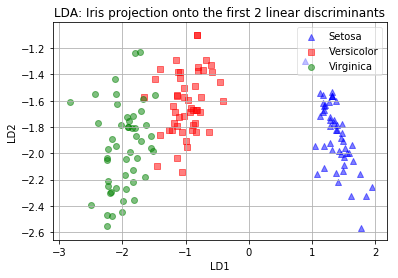

In [20]:
# Plotting results

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    plt.grid()
    plt.show()

plot_step_lda()

In [21]:
print("Linear Discriminant LD1 (eigenvector of A = inv(S_W).S_B with highest eigenvalue), separates classes satisfyingly. LD2 however doesn't add much improvement. ")

Linear Discriminant LD1 (eigenvector of A = inv(S_W).S_B with highest eigenvalue), separates classes satisfyingly. LD2 however doesn't add much improvement. 
